<a href="https://colab.research.google.com/github/Kim-Dong-Jun99/DSTermProject/blob/main/term_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TermProject

## Source and explanation of the dataset

The dataset is 'World Happiness Report' from Kaggle. 'World Happiness Report' has data of world happiness from 2015 to 2019

https://www.kaggle.com/datasets/unsdsn/world-happiness?datasetId=894&sortBy=voteCount&searchQuery=predict

The columns of each dataset include 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual' etc.

It is arranged in descending order according to the happiness score. The happiness score is the sum of the scores of other numerical features (except for Hapiness Rank).

The World Happiness Report is a landmark survey of the state of global happiness. The reports review the state of happiness in the world today and show how the


# Objective of our analysis
Analyze dataset to figure out characteristics of each continent in dataset then predict continent value of countries in dataset of 2017 using 2015, 2016 dataset for training

We will use clustering and classification algorithm to predict continent of countries in dataset of 2017 using 2015, 2016 happiness data report

Also, we will automate procedure of choosing best combination of scaler and algorithm that gives best result

# Data inspection

In [ ]:
#공유 드라이브 연동

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

from matplotlib.cm import get_cmap
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
drive.mount('/content/gdrive', force_remount = True)  # 공유 드라이브

df_2015_path = r'/content/gdrive/Shareddrives/data_science/dataset/2015.csv'
df_2016_path = r'/content/gdrive/Shareddrives/data_science/dataset/2016.csv'
df_2017_path = r'/content/gdrive/Shareddrives/data_science/dataset/2017.csv'

df_2015 = pd.read_csv(df_2015_path)
df_2016 = pd.read_csv(df_2016_path)
df_2017 = pd.read_csv(df_2017_path)

df_2015.head()


Mounted at /content/gdrive


Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

# Checking data info

In [ ]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [ ]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

# Column name and number of country is different, must be unificated

In [ ]:
# 각 데이터프레임들의 나라를 저장하는 리스트
# list for saving countries in each datasets
country_15 = []
country_16 = []
country_17 = []

for i in range(len(df_2015)):
    country_15.append(df_2015.iloc[i][0])

for i in range(len(df_2016)):
    country_16.append(df_2016.iloc[i][0])

for i in range(len(df_2017)):
    country_17.append(df_2017.iloc[i][0])

# 공통된 나라를 저장하기 위한 리스트
# list to save common countries in dataset
common = []
for i in country_15:
    if (i  in country_17 and i in country_16):
        common.append(i)


common.sort()

# 공통된 나라만 데이터세트에 남기기 위해서 공통으로 존재하지 않는 나라를 저장하기 위한 리스트
# list for saving countries that are non-common
drop15 = []
drop16 = []
drop17 = []

for i in range(len(df_2015)):
    if(df_2015.iloc[i][0] not in common):
        drop15.append(i)

for i in range(len(df_2016)):
    if(df_2016.iloc[i][0] not in common):
        drop16.append(i)

for i in range(len(df_2017)):
    if(df_2017.iloc[i][0] not in common):
        drop17.append(i)

print(len(df_2015))
print(len(df_2016))
print(len(df_2017))




158
157
155


# code for dropping countrires that are not in common list

In [ ]:
# drop15,drop16, drop17에 드랍해야할 나라들이 들어가있는데 그것을 적용해서 드랍할 나라들 드랍하기
# drop countries in each dataframe
df_2015.drop(drop15, axis = 0,inplace=True)
df_2016.drop(drop16, axis = 0,inplace=True)
df_2017.drop(drop17, axis = 0,inplace=True)

print(len(df_2015))
print(len(df_2016))
print(len(df_2017))


146
146
146


# 158, 157, 155개였던 나라들이 146개로 통일된 것을 볼 수 있다
# you can see that number of countries in each dataset is identical

# 이제 서로 다른 컬럼 명을 통일하기 인덱스 정리하기
# now we should unificate name of columns and reset index

In [ ]:
# 나라들이 드랍됐으니, index를 정리
# resetting index because countries has been dropped

df_2015.reset_index(drop=True,inplace = True)
df_2016.reset_index(drop=True, inplace = True)
df_2017.reset_index(drop=True, inplace = True)



In [ ]:
# 2017년도 데이터의 컬럼 명들이 다르기에 컬럼 명을 통일해주는 코드
# column name in 2017 is different, code for changing 2017 data column name
df_2017.rename(columns = {"Happiness.Rank":"Happiness Rank", "Happiness.Score":"Happiness Score","Economy..GDP.per.Capita.":"Economy (GDP per Capita)",
                          "Health..Life.Expectancy.":"Health (Life Expectancy)","Trust..Government.Corruption.":"Trust (Government Corruption)","Dystopia.Residual":"Dystopia Residual"}, inplace=True)
# 표준편차 같은 의미 없는 컬럼 들은 드랍하기
# dropping meaningless columns
c_drop15 = ['Standard Error']
c_drop16 = ['Lower Confidence Interval','Upper Confidence Interval']
c_drop17 = ['Whisker.high', 'Whisker.low']

df_2015.drop(c_drop15, axis=1,inplace=True)
df_2016.drop(c_drop16, axis=1,inplace=True)
df_2017.drop(c_drop17, axis=1,inplace=True)

# 칼럼까지 통일했으니, 2017년도에 없는 지역 컬럼을 추가해줘야하고, region 컬럼에 있는 값을 대륙으로 변경해야한다

# column name is unificated, now add region column in 2017 data and value in region column must be continent

In [ ]:
# 2017년도 데이터에 지역 컬럼을 추가해주기 위한 딕셔너리
# dictonary for adding region data in 2017 dataframe
region_dic = {}
# 각 년도별 데이터프레임에 있는 나라들이 동일하므로, 2017년도 데이터에 지역 컬럼을 추가해주는 코드
# adding region column to dataset of 2017 dataframe
for i in range(len(df_2016)):
  country = df_2016.iloc[i][0]
  region = df_2016.iloc[i][1]
  region_dic[country] = region

for i in range(len(df_2017)):
  df_2017.loc[i,'Region'] = region_dic[df_2017.loc[i,'Country']]

df_2017.head()



Country  Happiness Rank  Happiness Score  Economy (GDP per Capita)  \
0       Norway               1            7.537                  1.616463   
1      Denmark               2            7.522                  1.482383   
2      Iceland               3            7.504                  1.480633   
3  Switzerland               4            7.494                  1.564980   
4      Finland               5            7.469                  1.443572   

     Family  Health (Life Expectancy)   Freedom  Generosity  \
0  1.533524                  0.796667  0.635423    0.362012   
1  1.551122                  0.792566  0.626007    0.355280   
2  1.610574                  0.833552  0.627163    0.475540   
3  1.516912                  0.858131  0.620071    0.290549   
4  1.540247                  0.809158  0.617951    0.245483   

   Trust (Government Corruption)  Dystopia Residual          Region  
0                       0.315964           2.277027  Western Europe  
1                       0.400770           2.313707  Western Europe  
2                       0.153527           2.322715  Western Europe  
3                       0.367007           2.276716  Western Europe  
4                       0.382612           2.430182  Western Europe

# 2017년도 데이터에 지역 컬럼이 추가된 것을 확인할 수 있다, 이제 지역 컬럼에 있는 값을 지역이 아니라 대륙으로 변경해주자

# you can see that region column has been added to 2017 dataframe, now values in region column must be continent, 

In [ ]:
my_list=list()
# 지역 값을 대륙으로 변경시켜주는 코드
# changing region value into continent value
for index in df_2015["Region"]:
    if "Africa" in index:
        my_list.append("Africa")
    elif "Europe" in index:
        my_list.append("Europe")
    elif "Antartica"in index:
        my_list.append("Antartica")
    elif "Australia"in index:
        my_list.append("Australia")
    elif "North America"in index:
        my_list.append("North America")
    elif "Latin America" in index:
        my_list.append("South America")
    elif "Asia" in index:
        my_list.append("Asia")
df_2015["Region"]=my_list

my_list=list()
for index in df_2016["Region"]:
    if "Africa" in index:
        my_list.append("Africa")
    elif "Europe" in index:
        my_list.append("Europe")
    elif "Antartica"in index:
        my_list.append("Antartica")
    elif "Australia"in index:
        my_list.append("Australia")
    elif "North America"in index:
        my_list.append("North America")
    elif "Latin America" in index:
        my_list.append("South America")
    elif "Asia" in index:
        my_list.append("Asia")
df_2016["Region"]=my_list

my_list=list()
for index in df_2017["Region"]:
    if "Africa" in index:
        my_list.append("Africa")
    elif "Europe" in index:
        my_list.append("Europe")
    elif "Antartica"in index:
        my_list.append("Antartica")
    elif "Australia"in index:
        my_list.append("Australia")
    elif "North America"in index:
        my_list.append("North America")
    elif "Latin America" in index:
        my_list.append("South America")
    elif "Asia" in index:
        my_list.append("Asia")
df_2017["Region"]=my_list


In [ ]:
# 이제 데이터 세트를 보기 편하게 해주기 위해서 컬럼 순서를 2015년 데이터프레임에 맞춰주는 코드
# resetting order of dataframe column to 2015 data
df_2016 = df_2016[['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']]
df_2017 = df_2017[['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']]

In [ ]:
df_2015.head()

Country         Region  Happiness Rank  Happiness Score  \
0  Switzerland         Europe               1            7.587   
1      Iceland         Europe               2            7.561   
2      Denmark         Europe               3            7.527   
3       Norway         Europe               4            7.522   
4       Canada  North America               5            7.427   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.41978     0.29678            2.51738  
1                        0.14145     0.43630            2.70201  
2                        0.48357     0.34139            2.49204  
3                        0.36503     0.34699            2.46531  
4                        0.32957     0.45811            2.45176

In [ ]:
df_2016.head()

Country  Region  Happiness Rank  Happiness Score  \
0      Denmark  Europe               1            7.526   
1  Switzerland  Europe               2            7.509   
2      Iceland  Europe               3            7.501   
3       Norway  Europe               4            7.498   
4      Finland  Europe               5            7.413   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

In [ ]:
df_2017.head()

Country  Region  Happiness Rank  Happiness Score  \
0       Norway  Europe               1            7.537   
1      Denmark  Europe               2            7.522   
2      Iceland  Europe               3            7.504   
3  Switzerland  Europe               4            7.494   
4      Finland  Europe               5            7.469   

   Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                       0.315964    0.362012           2.277027  
1                       0.400770    0.355280           2.313707  
2                       0.153527    0.475540           2.322715  
3                       0.367007    0.290549           2.276716  
4                       0.382612    0.245483           2.430182

# dataframe unifiacation done

In [ ]:
# 처리한 데이터 프레임을 재활용하기 위해서 피클 파일로 저장하는 코드
# code for saving data into pickle file

# df_2015.to_pickle('/content/gdrive/Shareddrives/data_science/dataset/cleaned_2015.pkl')
# df_2016.to_pickle('/content/gdrive/Shareddrives/data_science/dataset/cleaned_2016.pkl')
# df_2017.to_pickle('/content/gdrive/Shareddrives/data_science/dataset/cleaned_2017.pkl')

In [ ]:
cleaned_2015 = pd.read_pickle('/content/gdrive/Shareddrives/data_science/dataset/cleaned_2015.pkl')
cleaned_2016 = pd.read_pickle('/content/gdrive/Shareddrives/data_science/dataset/cleaned_2016.pkl')
cleaned_2017 = pd.read_pickle('/content/gdrive/Shareddrives/data_science/dataset/cleaned_2017.pkl')
total = pd.read_pickle('/content/gdrive/Shareddrives/data_science/dataset/total.pkl')
total.reset_index(inplace=True)
total.drop(labels='index', axis=1, inplace=True)


# Big data end to end process

## data inspection


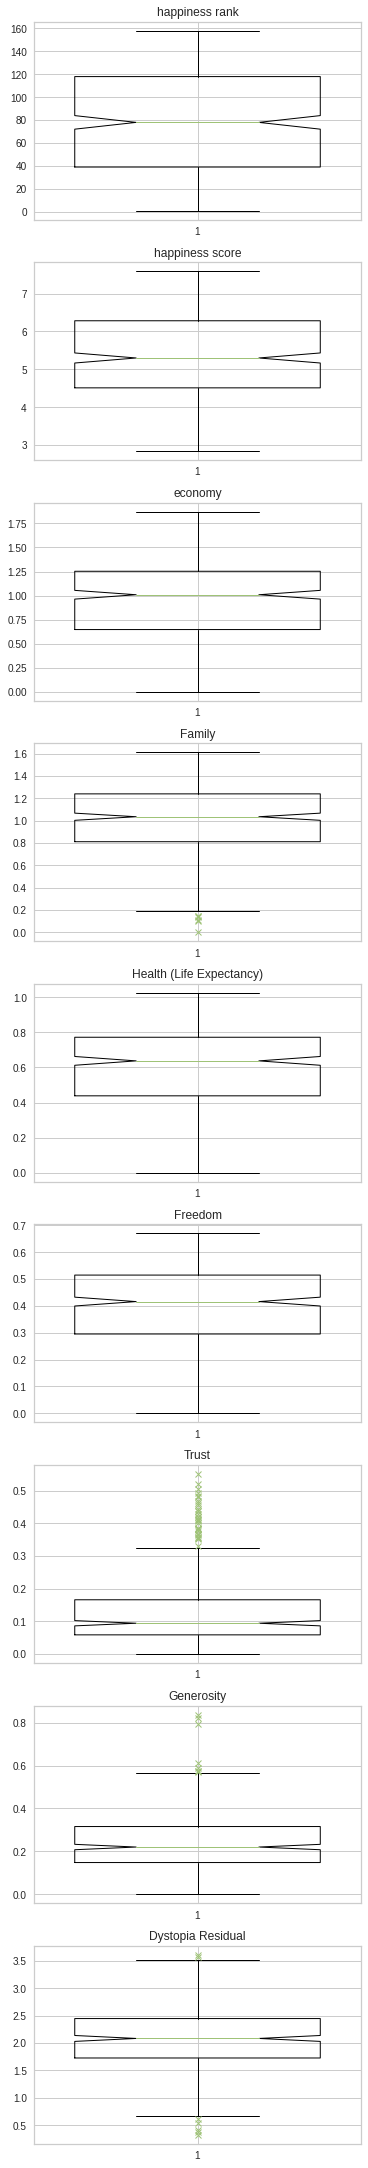

In [ ]:

# total = cleaned_2015.append(cleaned_2016, sort =False)
# total.append(cleaned_2017, sort = False)
fig, axes = plt.subplots(nrows=9, ncols=1, constrained_layout=True, figsize = (5,30))
fig.set_facecolor("white")
axes[0].boxplot(total['Happiness Rank'], sym='gx', widths = 0.75, notch = True)
axes[0].set_title("happiness rank")
axes[1].boxplot(total['Happiness Score'], sym='gx', widths = 0.75, notch = True)
axes[1].set_title("happiness score")
axes[2].boxplot(total['Economy (GDP per Capita)'], sym='gx', widths = 0.75, notch = True)
axes[2].set_title("economy")
axes[3].boxplot(total['Family'], sym='gx', widths = 0.75, notch = True)
axes[3].set_title("Family")
axes[4].boxplot(total['Health (Life Expectancy)'], sym='gx', widths = 0.75, notch = True)
axes[4].set_title("Health (Life Expectancy)")
axes[5].boxplot(total['Freedom'], sym='gx', widths = 0.75, notch = True)
axes[5].set_title("Freedom")
axes[6].boxplot(total['Trust (Government Corruption)'], sym='gx', widths = 0.75, notch = True)
axes[6].set_title("Trust")
axes[7].boxplot(total['Generosity'], sym='gx', widths = 0.75, notch = True)
axes[7].set_title("Generosity")
axes[8].boxplot(total['Dystopia Residual'], sym='gx', widths = 0.75, notch = True)
axes[8].set_title("Dystopia Residual")
plt.show()

## number of countries in each Regions

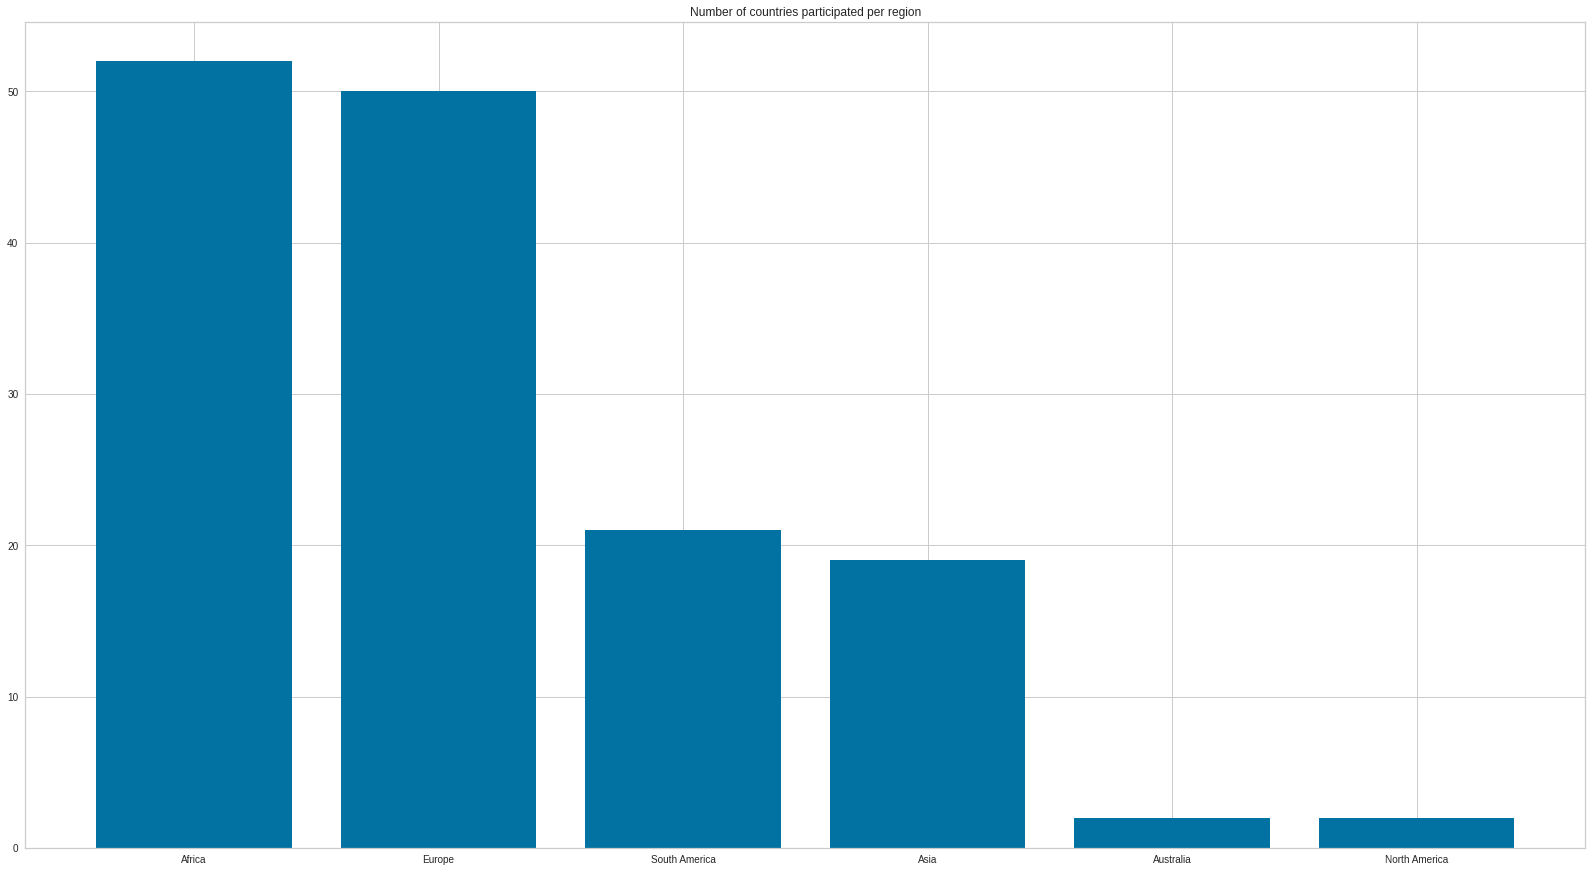

In [ ]:
def sortKey(key):
    return list(df_2015['Region'].values).count(key)

regions = list(set(list(df_2015['Region'].values)))
regions.sort(key = lambda a : sortKey(a), reverse=True)
regionsCount = []
for i in regions:
    regionsCount.append(list(df_2015['Region'].values).count(i))
fig, axes = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(22,12))
fig.set_facecolor("white")
axes.bar(regions,regionsCount)
axes.set_title("Number of countries participated per region")
plt.show()

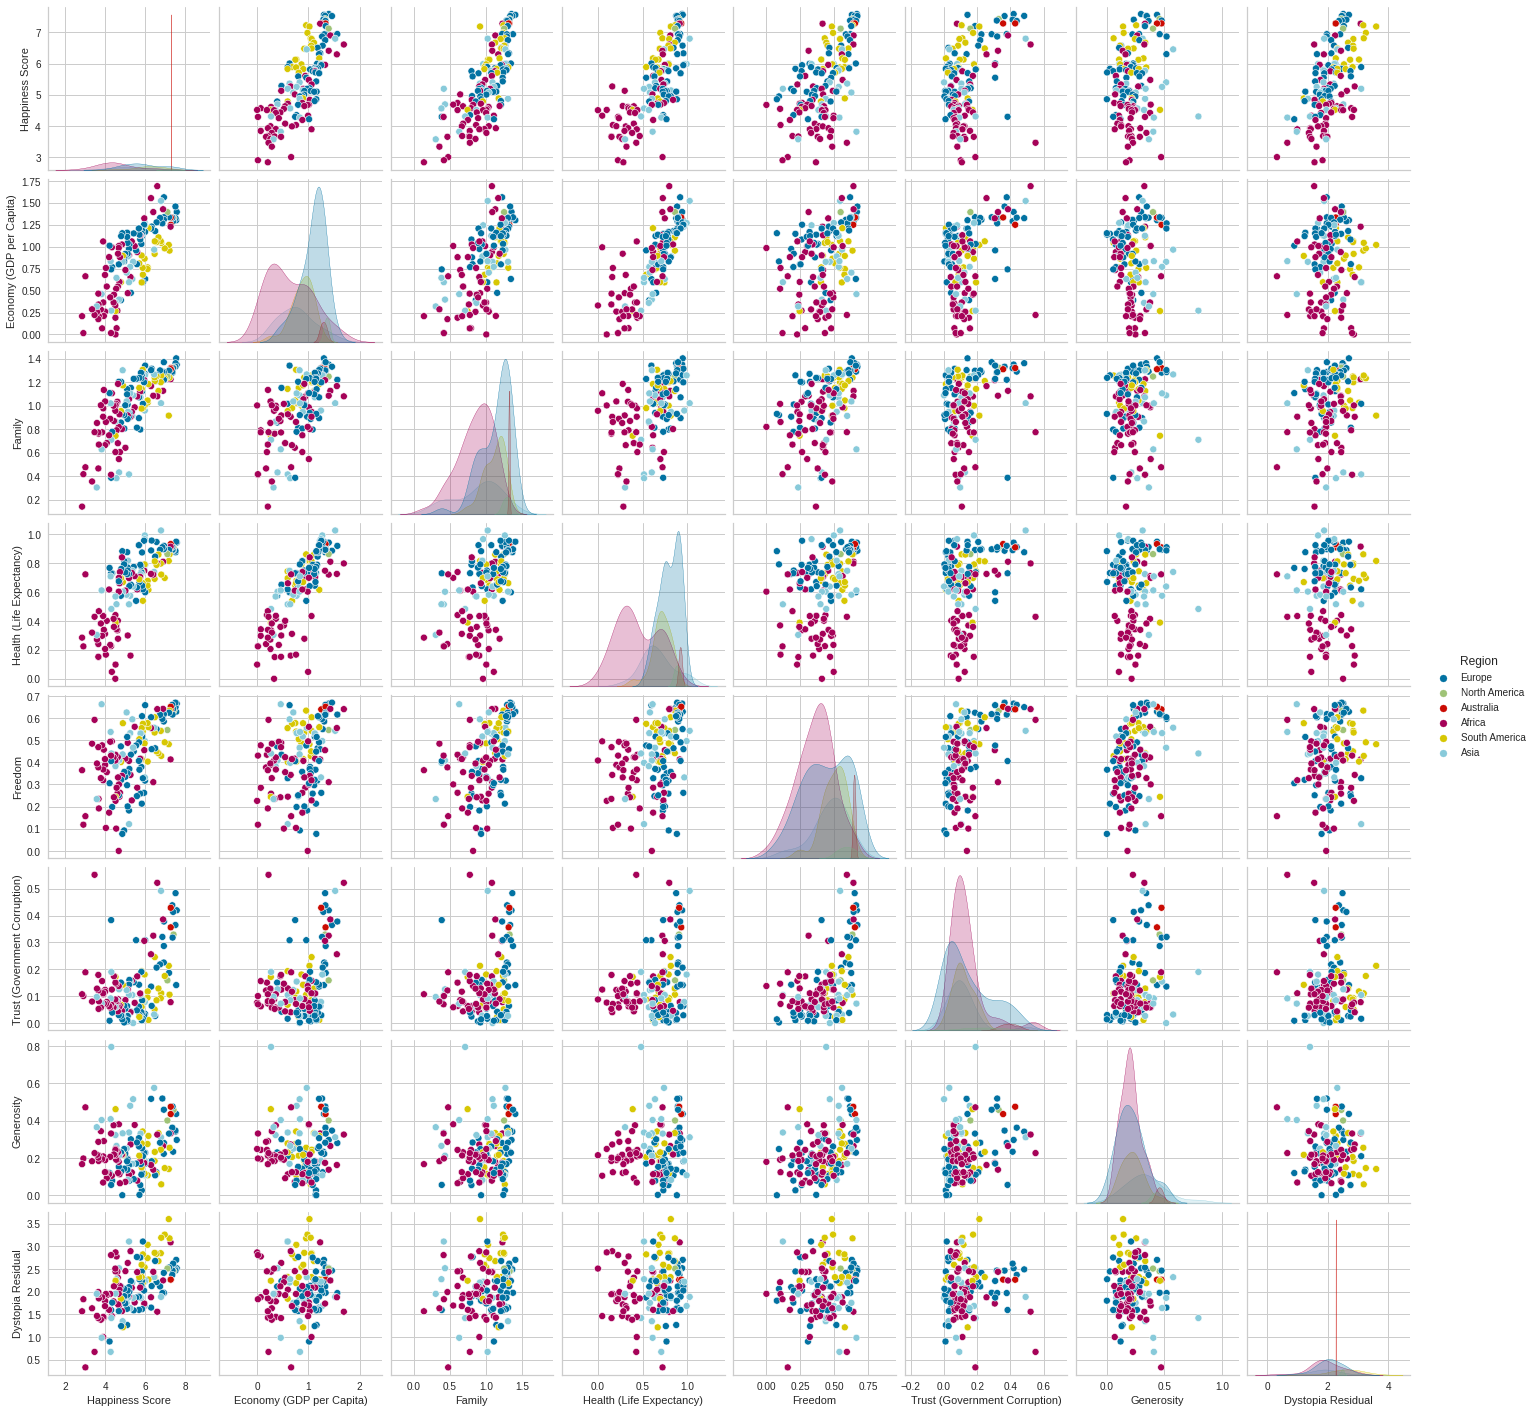

In [ ]:
sns.pairplot(cleaned_2015.drop(['Country','Happiness Rank'], axis = 1), hue = 'Region')
plt.show()

# Histogram of each data columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed9e02b990>,
      dtype=object)

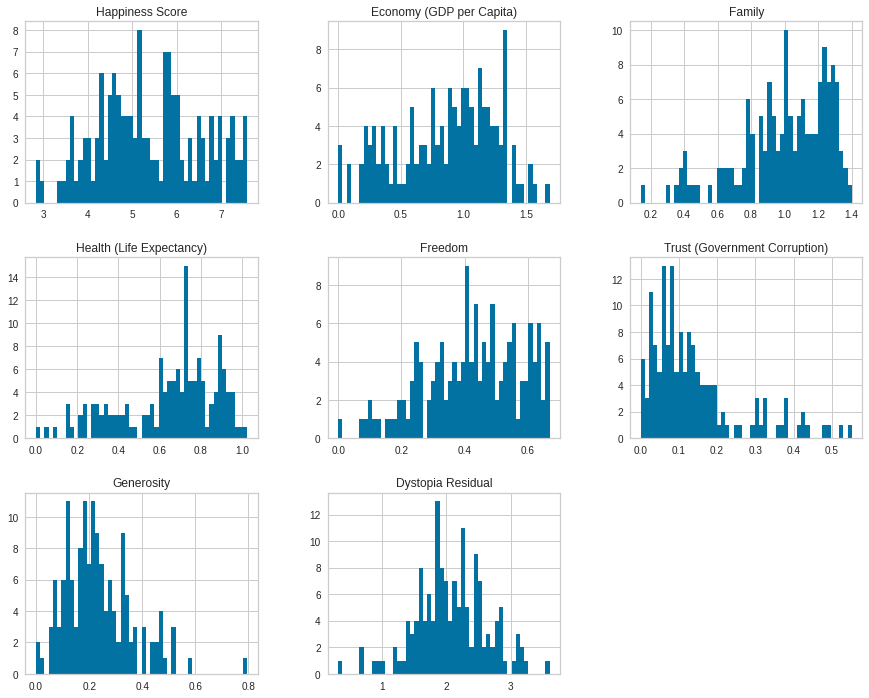

In [ ]:
cleaned_2015.drop('Happiness Rank', axis = 1).hist(bins = 50, figsize = (15,12))

# correlation matrix

Text(0.5, 1.0, 'Correlation Heatmap')

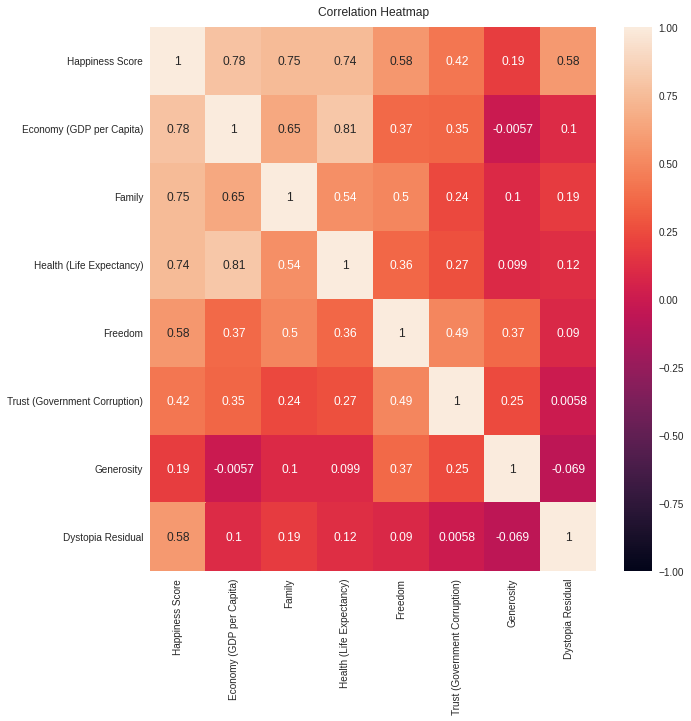

In [ ]:
plt.figure(figsize=(10,10))
corr_mat = sns.heatmap(cleaned_2015.drop('Happiness Rank', axis = 1).corr(), vmin=-1, vmax=1, annot=True)
corr_mat.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
# 데이터 프레임 대륙별로 나누기
# dividing dataframe per country

df_asia = cleaned_2015[cleaned_2015['Region'] == 'Asia']
df_africa = cleaned_2015[cleaned_2015['Region'] == 'Africa']
df_europe = cleaned_2015[cleaned_2015['Region'] == 'Europe']
df_southAmerica = cleaned_2015[cleaned_2015['Region'] == 'South America']
df_northAmerica = cleaned_2015[cleaned_2015['Region'] == 'North America']
df_australia = cleaned_2015[cleaned_2015['Region'] == 'Australia']


In [ ]:
cleaned_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        146 non-null    object 
 1   Region                         146 non-null    object 
 2   Happiness Rank                 146 non-null    int64  
 3   Happiness Score                146 non-null    float64
 4   Economy (GDP per Capita)       146 non-null    float64
 5   Family                         146 non-null    float64
 6   Health (Life Expectancy)       146 non-null    float64
 7   Freedom                        146 non-null    float64
 8   Trust (Government Corruption)  146 non-null    float64
 9   Generosity                     146 non-null    float64
 10  Dystopia Residual              146 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 12.7+ KB


In [ ]:

import plotly.express as px
fig = px.scatter(df_asia,
                x = 'Health (Life Expectancy)',
                y = 'Happiness Score',
                color = 'Country', 
                template='plotly_dark',
                facet_col_wrap = 5,
                labels ={"Health (Life Expectancy)":"Health"},
                title = 'Health vs Happiness Score for Europe, with Bubble size indication of GDP',
                )
fig.show()

In [ ]:
fig = px.scatter(df_europe,
                x = 'Health (Life Expectancy)',
                y = 'Happiness Score',
                color = 'Country', 
                template='plotly_dark',
                facet_col_wrap = 5,
                labels ={"Health (Life Expectancy)":"Health"},
                title = 'Health vs Happiness Score for Europe, with Bubble size indication of GDP',
                )
fig.show()

In [ ]:
df_asia.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [ ]:
fig = px.bar(data_frame=df_asia,
            x = 'Country',
            y = 'Happiness Score',
            color = 'Country',
            barmode='group',
            orientation= 'v',
            
            title='Happiness Score For Asia Countries',
             
            # range_y=[0,2],
             
            template='plotly_dark',
            # text='Score'
            )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside',
                 width = [0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4]) # thickness of the bar
fig.show()

# using clustering for data analysis

In [ ]:
processed_data = total.copy()

labelEncoder = LabelEncoder()
standard = StandardScaler()
minmax = MinMaxScaler()

def checkingMutualInfo(temp):
  temp['Region'] = labelEncoder.fit_transform(temp['Region'])
  temp.iloc[:, 4:] = minmax.fit_transform(temp.iloc[:,4:])
  x = temp.iloc[:,4:]
  y = temp.iloc[:,1]
  mi = mutual_info_classif(x,y)
  checkMi = pd.DataFrame(mi, index=['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],columns=['Score'])
  return checkMi

def visualizing(tst_columns, processed_data):
  plt.figure(figsize=(10,10))
  for i in range(2,8):
    estimator = KMeans(n_clusters = i)
    ids = estimator.fit_predict(processed_data[tst_columns])
    score = silhouette_score(processed_data[tst_columns], ids)
    print("silhouette score when k == %d : %f"%(i,score))
    plt.subplot(3,2,i-1)
    plt.tight_layout()
    plt.title("k values = {}".format(i))
    plt.xlabel('Happiness Score')
    plt.ylabel('Health (Life Exepectancy)')
    plt.scatter(processed_data['Happiness Score'], processed_data['Health (Life Expectancy)'], c=ids,cmap = get_cmap('plasma'))
  plt.show()

def KelbowVisualizing(tst_columns, processed_data):
  model = KMeans()
  model = KMeans()
  visualizer = KElbowVisualizer(model, k=(1,10))
  visualizer.fit(processed_data[tst_columns])
  visualizer.show()

def visualizingCluster(k, tst_columns, processed_data):
  model = KMeans(n_clusters=k)
  ids = model.fit_predict(processed_data[tst_columns])
  processed_data['cluster'] = pd.DataFrame(ids)
  fig,axes = plt.subplots()
  c1 = processed_data[processed_data['cluster'] == 0]

  c2 = processed_data[processed_data['cluster'] == 1]

  c3 = processed_data[processed_data['cluster'] == 2]
  itrs = [(c1,'r','cluster1'),(c2,'b','cluster2'),(c3,'black','cluster3')]

  for temp,color,cl in itrs:
    axes.scatter(temp['Happiness Score'], temp['Health (Life Expectancy)'],c = color,label = cl)
  axes.legend()

  axes.set_title('clusters')
  axes.set_xlabel('Happiness Score')
  axes.set_ylabel('Health (Life Exepectancy)')
  plt.show()

def visualizingClusterContinent(c_num,tst_columns, processed_data):
  model = KMeans(n_clusters=c_num)
  ids = model.fit_predict(processed_data[tst_columns])
  temp = total.copy()
  temp['cluster'] = pd.DataFrame(ids)
  clusterList = []
  for i in range(c_num):
    clusterList.append(temp[temp['cluster'] == i].groupby('Region').cluster.count())
  continents = ['Africa', 'Asia', 'Australia', 'Europe', 'North America',
       'South America']

  for i in clusterList:
    for j in continents:
      if (j not in i):
        i[j] = 0
    i = i[['Africa', 'Asia', 'Australia', 'Europe', 'North America',
       'South America']]
  bar_width = 0.25
  barlist = []
  clustername = []
  for i in range(c_num):
    tempbar = plt.bar(np.arange(len(continents))+i*bar_width, clusterList[i], bar_width,alpha = 0.5, label = 'cluster {0}'.format(i))
    barlist.append(tempbar[0])
    clustername.append('cluster {0}'.format(i))
  plt.title('continent')
  plt.ylabel('number of clusters')
  plt.xlabel('coninents')
  plt.xticks(np.arange(len(regions)), regions)
  plt.set_cmap(get_cmap('plasma'))
  plt.legend(tuple(barlist), tuple(clustername), fontsize = 15)

  plt.show()

In [ ]:
processed_data = total.copy()
checkMi = checkingMutualInfo(processed_data)
checkMi

Score
Happiness Score                0.367889
Economy (GDP per Capita)       0.195257
Family                         0.124241
Health (Life Expectancy)       0.420560
Freedom                        0.156804
Trust (Government Corruption)  0.174165
Generosity                     0.169086
Dystopia Residual              0.113535

silhouette score when k == 2 : 0.508858
silhouette score when k == 3 : 0.492431
silhouette score when k == 4 : 0.429061
silhouette score when k == 5 : 0.428035
silhouette score when k == 6 : 0.388558
silhouette score when k == 7 : 0.367052


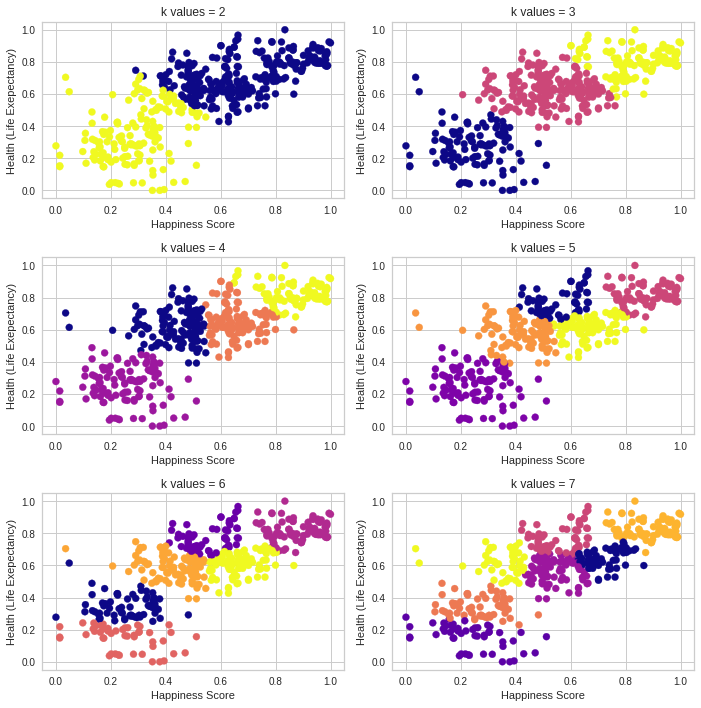

In [ ]:
visualizing(['Happiness Score', 'Health (Life Expectancy)'], processed_data)

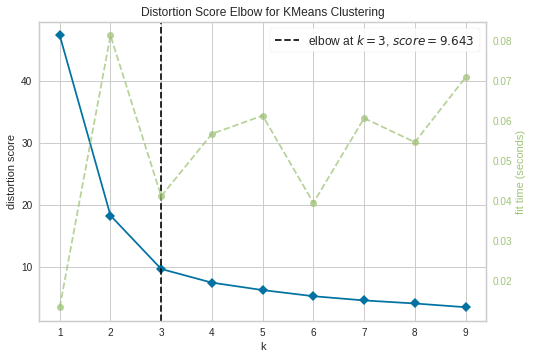

In [ ]:
KelbowVisualizing(['Happiness Score','Health (Life Expectancy)'], processed_data)


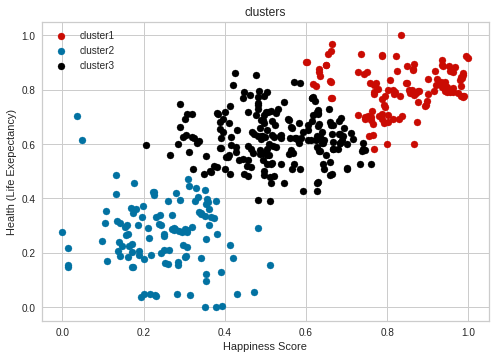

In [ ]:
visualizingCluster(3, ['Happiness Score','Health (Life Expectancy)'], processed_data)


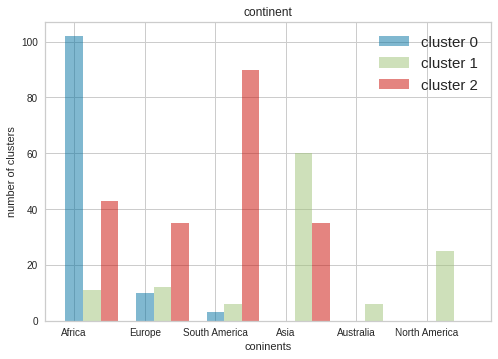

In [ ]:
visualizingClusterContinent(3,['Happiness Score','Health (Life Expectancy)'], processed_data)

# data preprocessing

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# cleaned_2015['']

# scaling class

In [ ]:
def scaling(df, scaler):
  temp = df.iloc[:, 4:]  
  scaled_df = temp
  scaled_df = scaler.fit_transform(scaled_df)
  scaled_df = pd.DataFrame(scaled_df, columns = temp.columns)

  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,5))
  ax1.set_title('Before Scaling')
  ax2.set_title('After Scaling')

  for i in temp.columns:
    sns.kdeplot(temp[i], ax=ax1)

  for i in scaled_df.columns:
    sns.kdeplot(scaled_df[i], ax=ax2)

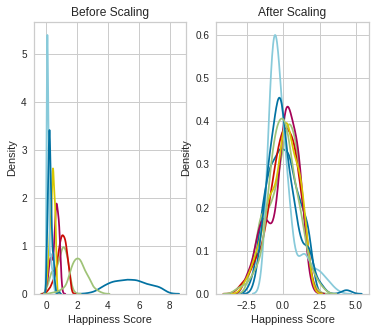

In [ ]:
scaling(total, StandardScaler())

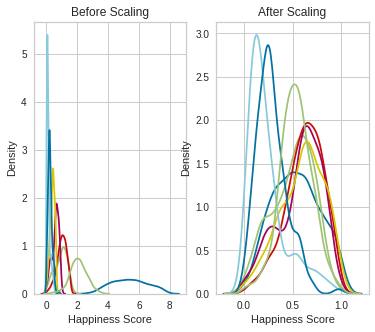

In [ ]:
scaling(total, MinMaxScaler())

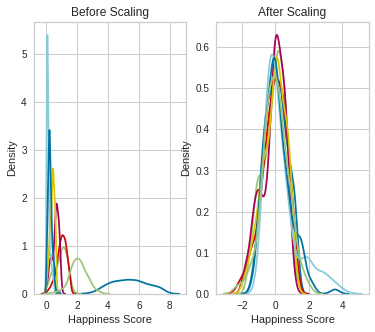

In [ ]:
scaling(total, RobustScaler())

# Classification

In [ ]:
standard = StandardScaler()
labelEncoder = LabelEncoder()

total = pd.read_pickle('/content/gdrive/Shareddrives/data_science/dataset/total.pkl')
total.reset_index(inplace=True)
total.drop(labels='index', axis=1, inplace=True)
total.columns

total['Country'] = labelEncoder.fit_transform(total['Country'])
total['Region'] = labelEncoder.fit_transform(total['Region'])
total['Happiness Category'] = labelEncoder.fit_transform(total['Happiness Category'])
total.iloc[:,4:] = standard.fit_transform(total.iloc[:, 4:])

grid_param = {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[2,4,6,8,10,12,14,16],'min_samples_split':[2,3,4,5,6,7]}
dtc = DecisionTreeClassifier()

gd_sr = GridSearchCV(estimator = dtc, param_grid = grid_param, cv = 5, n_jobs=-1)

# cat = total[total.columns[2]]
regions = total[total.columns[1]]
data = total.iloc[:,4:]


data_train, data_test, target_train, target_test = train_test_split(data, regions, test_size=0.25, random_state=42)

gd_sr.fit(data_train, target_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']})

In [ ]:
print(gd_sr.best_params_)
print(gd_sr.best_score_)

{'criterion': 'gini', 'max_depth': 14, 'min_samples_split': 4, 'splitter': 'random'}
0.744055944055944


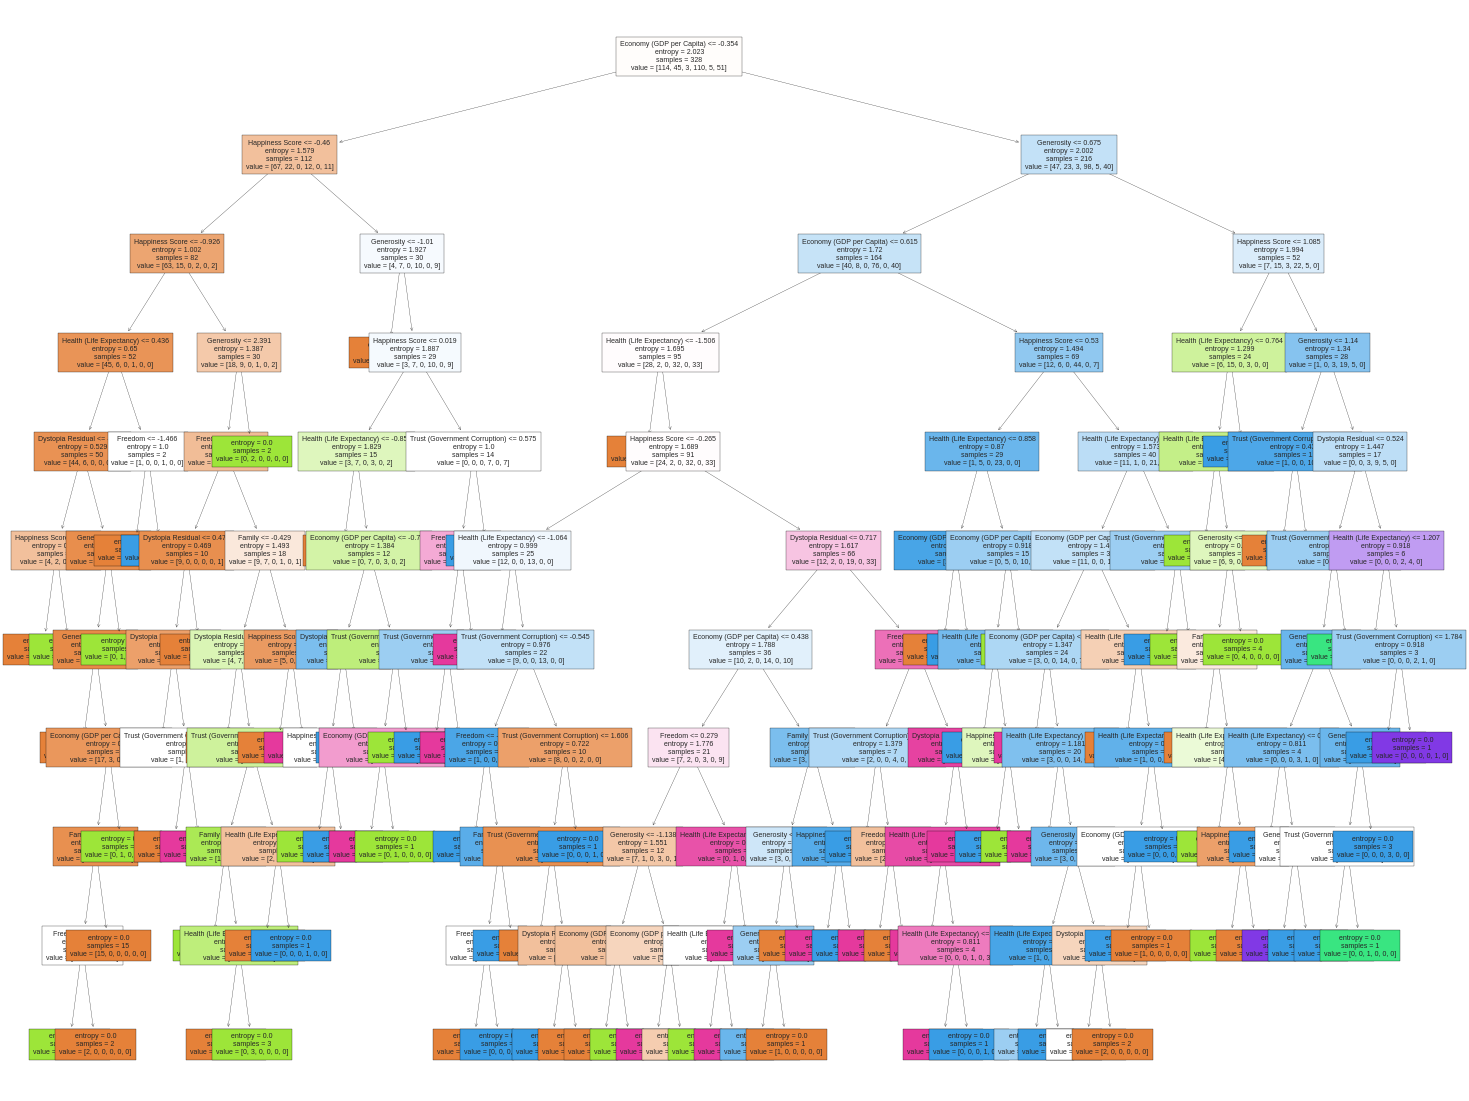

In [ ]:
tempmodel = DecisionTreeClassifier(criterion='entropy',max_depth=10, min_samples_split=2, splitter='random')
tempmodel.fit(data_train, target_train)
fn = ['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']

def visualizingTree(cls, fn):
  fig = plt.figure(figsize=(25,20))
  tree.plot_tree(cls, 
                   feature_names=fn,fontsize=7,  
                   filled=True)
  
visualizingTree(tempmodel, fn)

In [ ]:
class Classification:
  def __init__(self, df, encoder):
    self.df = df
    self.encoder = encoder
    
    self.df['Country'] = self.encoder.fit_transform(self.df['Country'])
    self.df['Region'] = self.encoder.fit_transform(self.df['Region'])
    self.df['Happiness Category'] = self.encoder.fit_transform(self.df['Happiness Category'])


  def getBestCombi(self):
    resultList = []
    scalerList = [[StandardScaler(),'standard scaler'], [MinMaxScaler(), 'minmax scaler'], [RobustScaler(),'robust scaler']]
    for i, str in scalerList:
      tempResult = self.decisiontree_classifier(i)
      tempResult.append(str)
      tempResult.append('decision tree')
      resultList.append(tempResult)
    for i, str in scalerList:
      tempResult = self.logistic_regression(i)
      tempResult.append(str)
      tempResult.append('logistic regression')
      resultList.append(tempResult)
    for i, str in scalerList:
      tempResult = self.randomforest_classifier(i)
      tempResult.append(str)
      tempResult.append('random forest')
      resultList.append(tempResult)
    resultList.sort(key = lambda i : i[0], reverse = True)

    for i in range(5):
      print("%d combination - score : %f model : %s scaler %s parameter : %s"%(i+1, resultList[i][0], resultList[i][3], resultList[i][2], resultList[i][1]))

    




  def decisiontree_classifier(self, scaler):
    # self.df = self.df.copy()
    temp = self.df.copy()
    temp.iloc[:,4:] = scaler.fit_transform(temp.iloc[:, 4:])
    dtc = DecisionTreeClassifier()

    grid_param = {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[2,4,6,8,10,12,14,16],'min_samples_split':[2,3,4,5,6,7]}
    gd_sr = GridSearchCV(estimator = dtc, param_grid = grid_param, cv = 5, n_jobs=-1)

    cat = temp[temp.columns[2]]
    regions = temp[temp.columns[1]]
    data = temp.iloc[:,4:]

    data_train, data_test, target_train, target_test = train_test_split(data, regions, test_size=0.25, random_state=42)

    gd_sr.fit(data_train, target_train)

    print('GridsearchCV 최적 파라미터: ', gd_sr.best_params_)
    print('GridsearchCV 최고 정확도: {0:.4f}'.format(gd_sr.best_score_))

    return [gd_sr.best_score_, gd_sr.best_params_]
  
  def logistic_regression(self, scaler):
    # self.df = self.df.copy()
    temp = self.df.copy()
    temp.iloc[:,4:] = scaler.fit_transform(temp.iloc[:, 4:])
    lgr = LogisticRegression()

    grid_param = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter':[50,100,200,400,600,800,1000],'warm_start':[True,False]}
    gd_sr = GridSearchCV(estimator= lgr, param_grid = grid_param, cv = 5, n_jobs=-1)

    cat = temp[temp.columns[2]]
    regions = temp[temp.columns[1]]
    data = temp.iloc[:,4:]

    data_train, data_test, target_train, target_test = train_test_split(data, regions, test_size=0.25, random_state=42)

    gd_sr.fit(data_train, target_train)

    print('GridsearchCV 최적 파라미터: ', gd_sr.best_params_)
    print('GridsearchCV 최고 정확도: {0:.4f}'.format(gd_sr.best_score_))
    return [gd_sr.best_score_, gd_sr.best_params_]
  

  def randomforest_classifier(self, scaler):
    # self.df = self.df.copy()
    temp = self.df.copy()
    temp.iloc[:,4:] = scaler.fit_transform(temp.iloc[:, 4:])
    rfc = RandomForestClassifier()

    grid_param = {'n_estimators':[100,300,500,800,1000],'criterion':['gini','entropy'],'bootstrap':[True,False]}
    gd_sr = GridSearchCV(estimator = rfc, param_grid = grid_param,cv = 5,n_jobs=-1)

    cat = temp[temp.columns[2]]
    regions = temp[temp.columns[1]]
    data = temp.iloc[:,4:]

    data_train, data_test, target_train, target_test = train_test_split(data, regions, test_size=0.25, random_state=42)

    gd_sr.fit(data_train, target_train)

    print('GridsearchCV 최적 파라미터: ', gd_sr.best_params_)
    print('GridsearchCV 최고 정확도: {0:.4f}'.format(gd_sr.best_score_))
    return [gd_sr.best_score_, gd_sr.best_params_]
  

In [ ]:
total = pd.read_pickle('/content/gdrive/Shareddrives/data_science/dataset/total.pkl')
total.reset_index(inplace=True)
total.drop(labels='index', axis=1, inplace=True)
tt = Classification(total, LabelEncoder())

tt.getBestCombi()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



GridsearchCV 최적 파라미터:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2, 'splitter': 'random'}
GridsearchCV 최고 정확도: 0.7229


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



GridsearchCV 최적 파라미터:  {'criterion': 'gini', 'max_depth': 14, 'min_samples_split': 2, 'splitter': 'best'}
GridsearchCV 최고 정확도: 0.7103


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



GridsearchCV 최적 파라미터:  {'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 2, 'splitter': 'best'}
GridsearchCV 최고 정확도: 0.7135


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



GridsearchCV 최적 파라미터:  {'max_iter': 50, 'solver': 'liblinear', 'warm_start': True}
GridsearchCV 최고 정확도: 0.6707


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



GridsearchCV 최적 파라미터:  {'max_iter': 50, 'solver': 'newton-cg', 'warm_start': True}
GridsearchCV 최고 정확도: 0.6434


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



GridsearchCV 최적 파라미터:  {'max_iter': 50, 'solver': 'liblinear', 'warm_start': True}
GridsearchCV 최고 정확도: 0.6738


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



GridsearchCV 최적 파라미터:  {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 100}
GridsearchCV 최고 정확도: 0.8203


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



GridsearchCV 최적 파라미터:  {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 800}
GridsearchCV 최고 정확도: 0.8142


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



GridsearchCV 최적 파라미터:  {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 800}
GridsearchCV 최고 정확도: 0.8143
1 combination - score : 0.820326 model : random forest scaler standard scaler parameter : {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 100}
2 combination - score : 0.814266 model : random forest scaler robust scaler parameter : {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 800}
3 combination - score : 0.814219 model : random forest scaler minmax scaler parameter : {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 800}
4 combination - score : 0.722937 model : decision tree scaler standard scaler parameter : {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2, 'splitter': 'random'}
5 combination - score : 0.713473 model : decision tree scaler robust scaler parameter : {'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 2, 'splitter': 'best'}


In [ ]:

bestmodel = RandomForestClassifier(bootstrap=False, criterion='gini', n_estimators=500)
bestmodel.fit(data_train, target_train)




estimator = bestmodel.estimators_[3]
fn = ['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
export_graphviz(estimator, out_file='tree.dot', feature_names = fn, class_names = 'Region', max_depth=3, precision = 3, filled = True, rounded= True)
# 생성된 .dot 파일을 .png로 변환
call(['dot', '-Tpng', 'tree.dot', '-o', '/content/gdrive/Shareddrives/data_science/decision-tree.png', '-Gdpi=600'])

# jupyter notebook에서 .png 직접 출력

Image(filename = '/content/gdrive/Shareddrives/data_science/decision-tree.png')
